In [1]:
"""
Orofacial gestures related to articulations are naturally distinguishable on the manifold of SPD matrices.

Subjects perform 13 distinct orofacial gestures that play crucial role in articulation.
They are - 
0: Cheeks - puff out, 
1: cheeks - suck in, 
2: jaw - dropdown,
3: jaw - move backward, 
4: jaw - move forward
5: jaw - move left, 
6: jaw - move right, 
7: lips - pucker,
8: lips - smile, 
9: lips - tuck as if blotting,
10: tongue - back of lower teeth,
11: tongue - back of upper teeth
12: tongue - the roof of the mouth

DATA is given in a numpy array of dimensions (130, 22, 7500) - (13 gestures each repeated 10 times, 22 channels, 7500 time samples).
Raw data was filtered using 3rd order Butterworth bandpass filter between 80 and 1000 Hertz. 
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
import matplotlib
import random
from matplotlib.colors import ListedColormap

from basicOperations.manifoldOperations import tSNEmbedding

In [2]:
numberOrofacialGestures = 13
trialsPerGesture = 10
numberTrials = numberOrofacialGestures * trialsPerGesture
numberChannels = 22
windowLength = 7500

LABELS = np.array([[i] * trialsPerGesture for i in range(numberOrofacialGestures)]).reshape(numberOrofacialGestures * trialsPerGesture)

In [3]:
def normalize(matrix):
    minVal = np.min(matrix)
    maxVal = np.max(matrix)
    normalizedMatrix = (matrix - minVal) / (maxVal - minVal)
    return normalizedMatrix

In [4]:
DATA = np.load("Experiment1/orofacialMovements/Subject" + str(1) + ".npy")
print(DATA.shape)

mean = np.mean(DATA, axis = -1)
std = np.std(DATA, axis = -1)
DATA = (DATA - mean[..., np.newaxis])/(std[..., np.newaxis] + 1e-5)

covarianceMatrices = np.zeros((numberTrials, numberChannels, numberChannels))

for trial in range(numberTrials):
    temp = normalize(DATA[trial, :, :] @ np.transpose(DATA[trial, :, :]))
    covarianceMatrices[trial] = 0.9 * temp + 0.1 * np.trace(temp) * np.eye(22) 

(130, 22, 7500)


In [5]:
tSNE = tSNEmbedding()

In [6]:
out = tSNE.tSNE(covarianceMatrices, 5, 22)

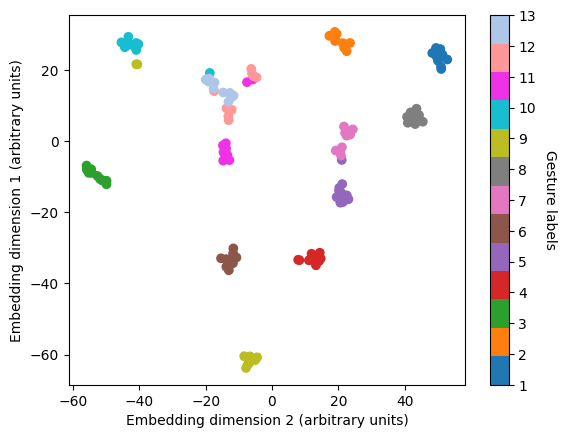

In [7]:
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#f032e6', '#ff9896', '#aec7e8'
]


colors = ListedColormap(colors)

plt.scatter(out[:, 0], out[:, 1], c = LABELS.reshape(-1), cmap = colors, marker = 'o')
plt.xlabel('Embedding dimension 2 (arbitrary units)')
plt.ylabel('Embedding dimension 1 (arbitrary units)')

cb = plt.colorbar()
numCategories = len(set(LABELS))  
cb.set_ticks(range(numCategories))
cb.set_ticklabels([format(i + 1) for i in range(numCategories)])
cb.set_label('Gesture labels', rotation = 270, labelpad = 15)
plt.show()
plt.close()